In [2]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

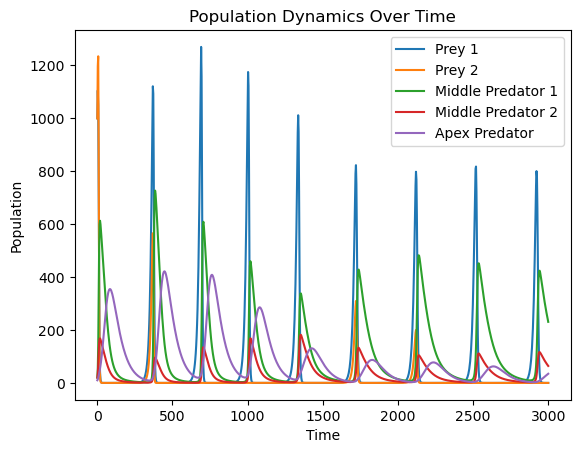

0.004421203547122112
4.2447999944164705e-10
230.85574242400074
64.17927219579258
34.64708764682433


In [45]:
# Model 4a1 (Chain 1): 2 prey, 2 middle predators (1 can eat both prey, 1 can eat only 1 prey), and 1 apex predator (can eat all the preys and middle predators)

# x1 = population density of prey 1
# x2 = population density of prey 2
# y1 = population density of middle predator 1
# y2 = population density of middle predator 2
# z = population density of apex predator

a1 = 0.08 # 0.5 # prey 1 growth rate
a2 = 0.09 # 0.5 # prey 1 growth rate

b11 = 0.0004 # 0.1 # middle predator 1 kill rate of prey 1
b12 = 0.0009 # 0.1 # middle predator 1 kill rate of prey 2
c1 = 0.01 # 0.1 # middle predator 1 death rate
d11 = 0.0002 # 0.1 # middle predator 1 growth rate from eating prey 1
d12 = 0.0001 # 0.1 # middle predator 1 growth rate from eating prey 2

b21 = 0.0012 # 0.1 # middle predator 2 kill rate of prey 1
c2 = 0.01 # 0.1 # middle predator 2 death rate
d21 = 0.0002 # 0.1 # middle predator 2 growth rate from eating prey 1

b31 = 0.00006 # 0.1 # apex predator kill rate of prey 1
b32 = 0.00005 #0.1 #apex predator kill rate of prey 2
b33 = 0.0006 #0.1 apex predator kill rate of middle predator 1
b34 = 0.0003 #0.1 apex predator kill rate of middle predator 2
c3 = 0.0175 # 0.1 # apex predator death rate
d31 = 0.00005 # 0.1 # apex predator growth rate from eating prey 1
d32 = 0.00005 # 0.1 # apex predator growth rate from eating prey 2
d33 = 0.0001 # 0.1 # apex predator growth rate from eating middle predator 1
d34 = 0.0001 # 0.1 # apex predator growth rate from eating middle predator 2

# defining the Lotka-Volterra differential equations
def dSdt(S, t):
    x1, x2, y1, y2, z = S
    return [a1*x1 - b11*x1*y1 - b21*x1*y2 - b31*x1*z,
            a2*x2 - b12*x2*y1 - b32*x2*z,
            -c1*y1 + d11*x1*y1 + d12*x2*y1 - b31*y1*z,
            -c2*y2 + d21*x1*y2 - b32*y2*z,
            -c3*z + d31*x1*z + d32*x2*z + d33*y1*z +d34*y2*z
           ]

x10 = 1000 # initial prey  1population
x20 = 1000 # initial prey 2 population
y10 = 20 # initial middle predator 1 population
y20 = 20 # initial middle predator 2 population
z0 = 10 #initial apex predator population
S0 = (x10, x20, y10, y20, z0)

t = np.linspace(0, 3000, 1000) # time array

sol1 = odeint(dSdt, S0, t) # solving differential equations

sol_x1 = sol1[:, 0] # prey 1 population over time
sol_x2 = sol1[:, 1] # prey 2 population over time
sol_y1 = sol1[:, 2] # middle predator 1 population over time
sol_y2 = sol1[:, 3] # middle predator 2 population over time
sol_z1 = sol1[:, 4] # apex predator population over time

# Plotting populations over time
plt.plot(t, sol_x1, label = "Prey 1")
plt.plot(t, sol_x2, label = "Prey 2")
plt.plot(t, sol_y1, label = "Middle Predator 1")
plt.plot(t, sol_y2, label = "Middle Predator 2")
plt.plot(t, sol_z1, label = "Apex Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()

print(sol_x1[-1])
print(sol_x2[-1])
print(sol_y1[-1])
print(sol_y2[-1])
print(sol_z1[-1])


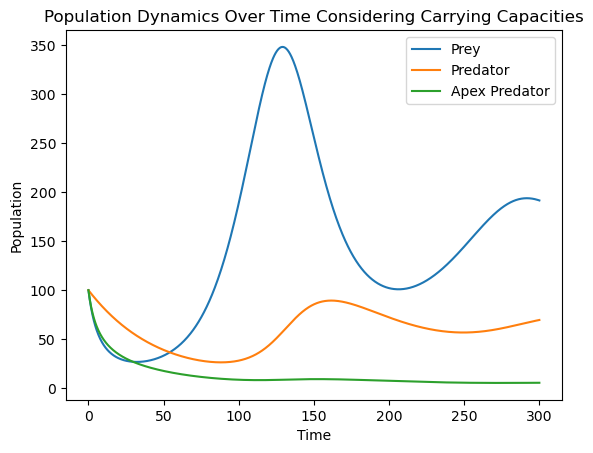

5.5011621428126345


In [ ]:
# Model 4a2 (Chain1): 1 prey, 1 middle predator (can eat only the prey), and 1 apex predator (can eat both the prey and middle predator), with carrying capacity

# carrying capacity of an environment = the maximum population size of a biological species that can be 
# sustained by that specific environment, given the food, habitat, water, and other resources available (Wikipedia)

k1 = 2000 # carrying capacity of prey population
k2 = 200 # carrying capacity of middle predator population
k3 = 20 # carrying capacity of apex predator population




def dSdt(S, t):
    x, y, z = S
    return [a*x*(1-x/k1) - b1*x*y -b21*x*z,
            -c1*y + d1*x*y*(1-y/k2) - b22*y*z,
            -c2*z + d21*x*z*(1-z/k3) + d22*y*z*(1-z/k3)
           ]

x0 = 100 # initial prey population
y0 = 100 # initial middle predator populations
z0 = 100 # initial apex predator population
S0 = (x0, y0, z0)

t = np.linspace(0, 300, 1000) # time array

sol2 = odeint(dSdt, S0, t) # solving differential equations

sol_x2 = sol2[:, 0] # prey population over time
sol_y2 = sol2[:, 1] # predator population over time
sol_z2 = sol2[:, 2] # predator population over time

# Plotting populations over time
plt.plot(t, sol_x2, label = "Prey")
plt.plot(t, sol_y2, label = "Predator")
plt.plot(t, sol_z2, label = "Apex Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time Considering Carrying Capacities")
plt.show()

